In [1]:
student_roll_number = 99


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set a seed for reproducibility based on your roll number
np.random.seed(student_roll_number)

# --- Define the number of data points ---
num_customers = 150 + np.random.randint(50)

# --- Generate data for each column ---
customer_ids = np.arange(1001, 1001 + num_customers)
ages = np.random.randint(18, 70, size=num_customers)
regions = np.random.choice(['North', 'South', 'East', 'West'], size=num_customers, p=[0.3, 0.2, 0.25, 0.25])

# Ordinal data: Membership Level
membership_levels = np.random.choice(
    ['Bronze', 'Silver', 'Gold', 'Platinum'],
    size=num_customers,
    p=[0.40, 0.30, 0.20, 0.10]
)

# Numerical data: Total Spend, with some correlation to membership level
spend_base = np.random.normal(loc=1500, scale=400, size=num_customers)
membership_bonus = {'Bronze': 0, 'Silver': 500, 'Gold': 1500, 'Platinum': 3000}
spend_bonuses = np.array([membership_bonus[level] for level in membership_levels])
total_spend = (spend_base + spend_bonuses).astype(int)

# Introduce some high-value outliers
outlier_indices = np.random.choice(num_customers, 4, replace=False)
total_spend[outlier_indices] = [12000, 15500, 19000, 25000]

last_purchase_days_ago = np.random.randint(1, 365, size=num_customers)
has_churned = np.random.choice(['Yes', 'No'], size=num_customers, p=[0.2, 0.8])

# --- Assemble the DataFrame ---
data = {
    'CustomerID': customer_ids,
    'Age': ages,
    'Region': regions,
    'MembershipLevel': membership_levels,
    'TotalSpend': total_spend.astype(float), # Make float to hold NaNs later
    'LastPurchaseDaysAgo': last_purchase_days_ago,
    'HasChurned': has_churned
}
df = pd.DataFrame(data)

# --- Intentionally introduce missing values for the cleaning step ---
spend_missing_indices = df.sample(n=10).index
df.loc[spend_missing_indices, 'TotalSpend'] = np.nan

region_missing_indices = df.sample(n=6).index
df.loc[region_missing_indices, 'Region'] = np.nan

print("First 10 Data Points")
df.head()


First 10 Data Points


,CustomerID,Age,Region,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned
0,1001,53,NaN,Platinum,4078.0,14,No
1,1002,58,North,Gold,NaN,248,Yes
2,1003,27,South,Silver,1844.0,8,No
3,1004,58,North,Gold,3553.0,22,No
4,1005,36,North,Bronze,1074.0,344,No


In [4]:
df['TotalSpend'].fillna(df['TotalSpend'].median(), inplace=True)


In [23]:
df.head()


,CustomerID,Age,Region,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned
0,1001,53,North,Platinum,4078.0,14,No
1,1002,58,North,Gold,2043.0,248,Yes
2,1003,27,South,Silver,1844.0,8,No
3,1004,58,North,Gold,3553.0,22,No
4,1005,36,North,Bronze,1074.0,344,No


In [6]:
df['Region'].fillna(df['Region'].mode()[0], inplace=True)


In [22]:
df.head()


,CustomerID,Age,Region,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned
0,1001,53,North,Platinum,4078.0,14,No
1,1002,58,North,Gold,2043.0,248,Yes
2,1003,27,South,Silver,1844.0,8,No
3,1004,58,North,Gold,3553.0,22,No
4,1005,36,North,Bronze,1074.0,344,No


In [8]:
df.isnull().sum()


CustomerID             0
Age                    0
Region                 0
MembershipLevel        0
TotalSpend             0
LastPurchaseDaysAgo    0
HasChurned             0
dtype: int64

In [9]:
df_encoded = df.copy()


In [21]:
df_encoded.head()


,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West
0,1001,53,4,4078.0,14,0,True,False,False
1,1002,58,3,2043.0,248,1,True,False,False
2,1003,27,2,1844.0,8,0,False,True,False
3,1004,58,3,3553.0,22,0,True,False,False
4,1005,36,1,1074.0,344,0,True,False,False


In [12]:
df_encoded = pd.get_dummies(df_encoded, columns=['Region'], drop_first=True)


In [20]:
df_encoded.head()


,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West
0,1001,53,4,4078.0,14,0,True,False,False
1,1002,58,3,2043.0,248,1,True,False,False
2,1003,27,2,1844.0,8,0,False,True,False
3,1004,58,3,3553.0,22,0,True,False,False
4,1005,36,1,1074.0,344,0,True,False,False


In [14]:
df_encoded['HasChurned'] = df_encoded['HasChurned'].map({'No': 0, 'Yes': 1})


In [19]:
df_encoded.head()


,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West
0,1001,53,4,4078.0,14,0,True,False,False
1,1002,58,3,2043.0,248,1,True,False,False
2,1003,27,2,1844.0,8,0,False,True,False
3,1004,58,3,3553.0,22,0,True,False,False
4,1005,36,1,1074.0,344,0,True,False,False


In [16]:
membership_mapping = {
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4
}

df_encoded['MembershipLevel'] = df_encoded['MembershipLevel'].map(membership_mapping)


In [24]:
df_encoded.head()


,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West
0,1001,53,4,4078.0,14,0,True,False,False
1,1002,58,3,2043.0,248,1,True,False,False
2,1003,27,2,1844.0,8,0,False,True,False
3,1004,58,3,3553.0,22,0,True,False,False
4,1005,36,1,1074.0,344,0,True,False,False


In [18]:
df_encoded.head()


,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West
0,1001,53,4,4078.0,14,0,True,False,False
1,1002,58,3,2043.0,248,1,True,False,False
2,1003,27,2,1844.0,8,0,False,True,False
3,1004,58,3,3553.0,22,0,True,False,False
4,1005,36,1,1074.0,344,0,True,False,False


In [25]:
df_encoded['ActiveDays'] = 365 - df_encoded['LastPurchaseDaysAgo']


In [26]:
df_encoded.head()

,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West,ActiveDays
0,1001,53,4,4078.0,14,0,True,False,False,351
1,1002,58,3,2043.0,248,1,True,False,False,117
2,1003,27,2,1844.0,8,0,False,True,False,357
3,1004,58,3,3553.0,22,0,True,False,False,343
4,1005,36,1,1074.0,344,0,True,False,False,21


In [27]:
df_encoded['SpendPerDayActive'] = df_encoded['TotalSpend'] / df_encoded['ActiveDays']


In [28]:
df_encoded.head()

,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West,ActiveDays,SpendPerDayActive
0,1001,53,4,4078.0,14,0,True,False,False,351,11.618234
1,1002,58,3,2043.0,248,1,True,False,False,117,17.461538
2,1003,27,2,1844.0,8,0,False,True,False,357,5.165266
3,1004,58,3,3553.0,22,0,True,False,False,343,10.358601
4,1005,36,1,1074.0,344,0,True,False,False,21,51.142857


In [29]:
df_encoded[['CustomerID', 'TotalSpend', 'LastPurchaseDaysAgo', 'ActiveDays', 'SpendPerDayActive']].head()


,CustomerID,TotalSpend,LastPurchaseDaysAgo,ActiveDays,SpendPerDayActive
0,1001,4078.0,14,351,11.618234
1,1002,2043.0,248,117,17.461538
2,1003,1844.0,8,357,5.165266
3,1004,3553.0,22,343,10.358601
4,1005,1074.0,344,21,51.142857


In [30]:
from scipy import stats
z_scores = np.abs(stats.zscore(df_encoded[['TotalSpend', 'SpendPerDayActive']]))
outliers_z = (z_scores > 3).any(axis=1)
df_encoded[outliers_z]


,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West,ActiveDays,SpendPerDayActive
21,1022,26,1,1483.0,359,0,True,False,False,6,247.166667
38,1039,37,2,12000.0,5,0,False,False,True,360,33.333333
51,1052,47,4,4601.0,354,0,False,True,False,11,418.272727
85,1086,62,4,19000.0,248,0,True,False,False,117,162.393162
147,1148,21,1,1152.0,363,0,False,False,True,2,576.000000


In [31]:
cols = ['TotalSpend', 'SpendPerDayActive']


Q1 = df_encoded[cols].quantile(0.25)
Q3 = df_encoded[cols].quantile(0.75)
IQR = Q3 - Q1


outliers_iqr = ((df_encoded[cols] < (Q1 - 1.5 * IQR)) | (df_encoded[cols] > (Q3 + 1.5 * IQR))).any(axis=1)


df_encoded[outliers_iqr]


,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West,ActiveDays,SpendPerDayActive
4,1005,36,1,1074.0,344,0,True,False,False,21,51.142857
9,1010,53,4,4926.0,167,1,False,True,False,198,24.878788
18,1019,18,3,2043.0,355,0,False,True,False,10,204.300000
19,1020,30,4,4620.0,344,0,True,False,False,21,220.000000
21,1022,26,1,1483.0,359,0,True,False,False,6,247.166667
31,1032,35,3,2789.0,353,0,True,False,False,12,232.416667
38,1039,37,2,12000.0,5,0,False,False,True,360,33.333333
44,1045,50,3,3319.0,314,0,False,True,False,51,65.078431
50,1051,29,2,2131.0,326,1,False,False,True,39,54.641026
51,1052,47,4,4601.0,354,0,False,True,False,11,418.272727


In [32]:
df_scaled = df_encoded.copy()


In [33]:
df_scaled.head()

,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West,ActiveDays,SpendPerDayActive
0,1001,53,4,4078.0,14,0,True,False,False,351,11.618234
1,1002,58,3,2043.0,248,1,True,False,False,117,17.461538
2,1003,27,2,1844.0,8,0,False,True,False,357,5.165266
3,1004,58,3,3553.0,22,0,True,False,False,343,10.358601
4,1005,36,1,1074.0,344,0,True,False,False,21,51.142857


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler_age = MinMaxScaler()
df_scaled['Age_Scaled'] = scaler_age.fit_transform(df_scaled[['Age']])


In [35]:
df_scaled.head()

,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West,ActiveDays,SpendPerDayActive,Age_Scaled
0,1001,53,4,4078.0,14,0,True,False,False,351,11.618234,0.70
1,1002,58,3,2043.0,248,1,True,False,False,117,17.461538,0.80
2,1003,27,2,1844.0,8,0,False,True,False,357,5.165266,0.18
3,1004,58,3,3553.0,22,0,True,False,False,343,10.358601,0.80
4,1005,36,1,1074.0,344,0,True,False,False,21,51.142857,0.36


In [36]:
from sklearn.preprocessing import StandardScaler

scaler_spend = StandardScaler()
df_scaled['TotalSpend_Scaled'] = scaler_spend.fit_transform(df_scaled[['TotalSpend']])


In [37]:
df_scaled.head()

,CustomerID,Age,MembershipLevel,TotalSpend,LastPurchaseDaysAgo,HasChurned,Region_North,Region_South,Region_West,ActiveDays,SpendPerDayActive,Age_Scaled,TotalSpend_Scaled
0,1001,53,4,4078.0,14,0,True,False,False,351,11.618234,0.70,0.880723
1,1002,58,3,2043.0,248,1,True,False,False,117,17.461538,0.80,-0.212399
2,1003,27,2,1844.0,8,0,False,True,False,357,5.165266,0.18,-0.319294
3,1004,58,3,3553.0,22,0,True,False,False,343,10.358601,0.80,0.598713
4,1005,36,1,1074.0,344,0,True,False,False,21,51.142857,0.36,-0.732907


In [38]:
df_scaled[['Age', 'Age_Scaled', 'TotalSpend', 'TotalSpend_Scaled']].head()


,Age,Age_Scaled,TotalSpend,TotalSpend_Scaled
0,53,0.70,4078.0,0.880723
1,58,0.80,2043.0,-0.212399
2,27,0.18,1844.0,-0.319294
3,58,0.80,3553.0,0.598713
4,36,0.36,1074.0,-0.732907


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)


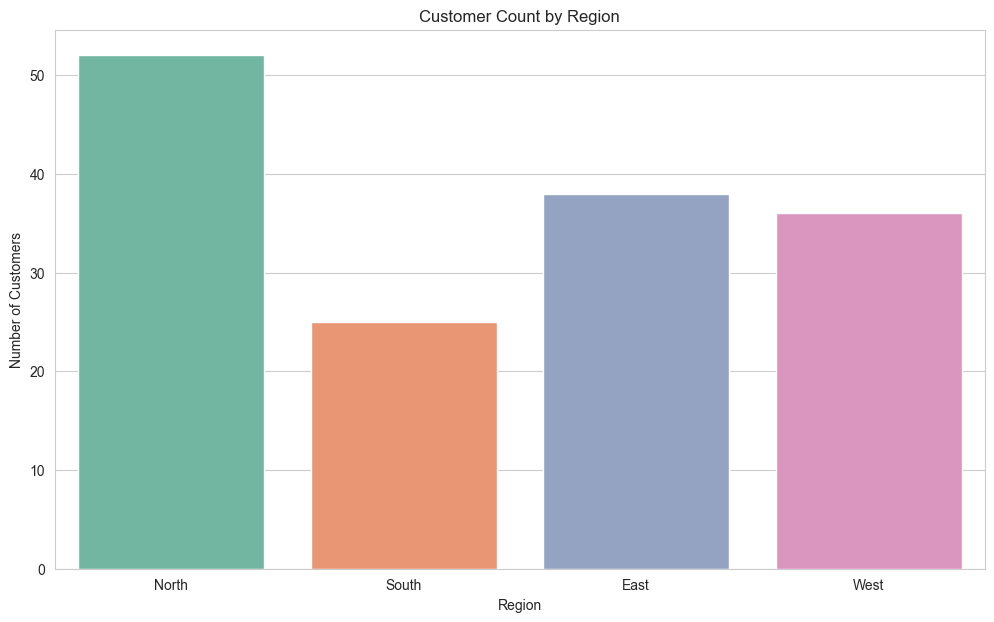

In [40]:
sns.countplot(data=df, x='Region', palette='Set2')
plt.title('Customer Count by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


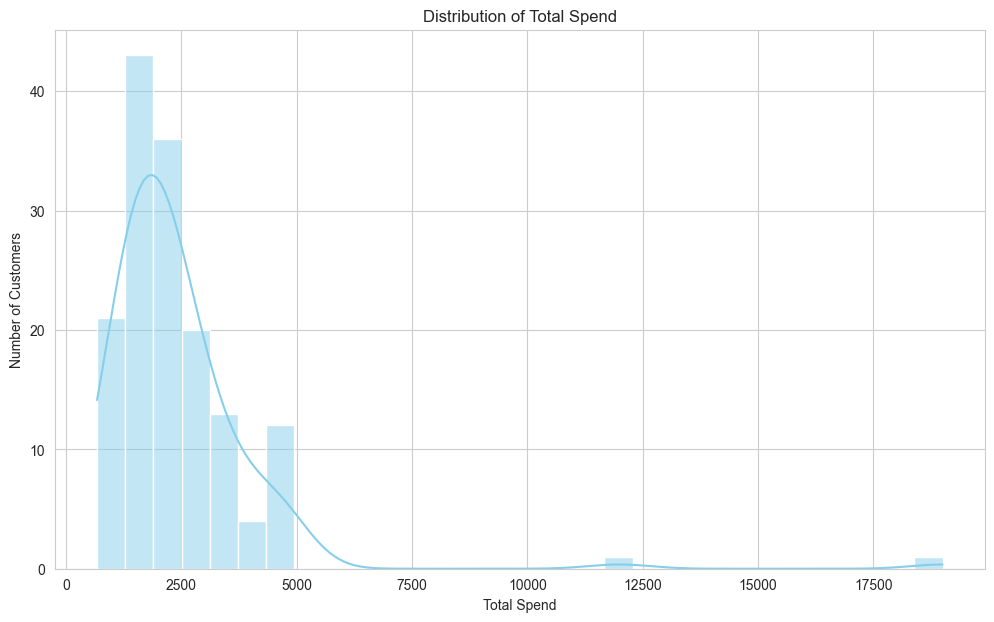

In [41]:
sns.histplot(data=df, x='TotalSpend', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()


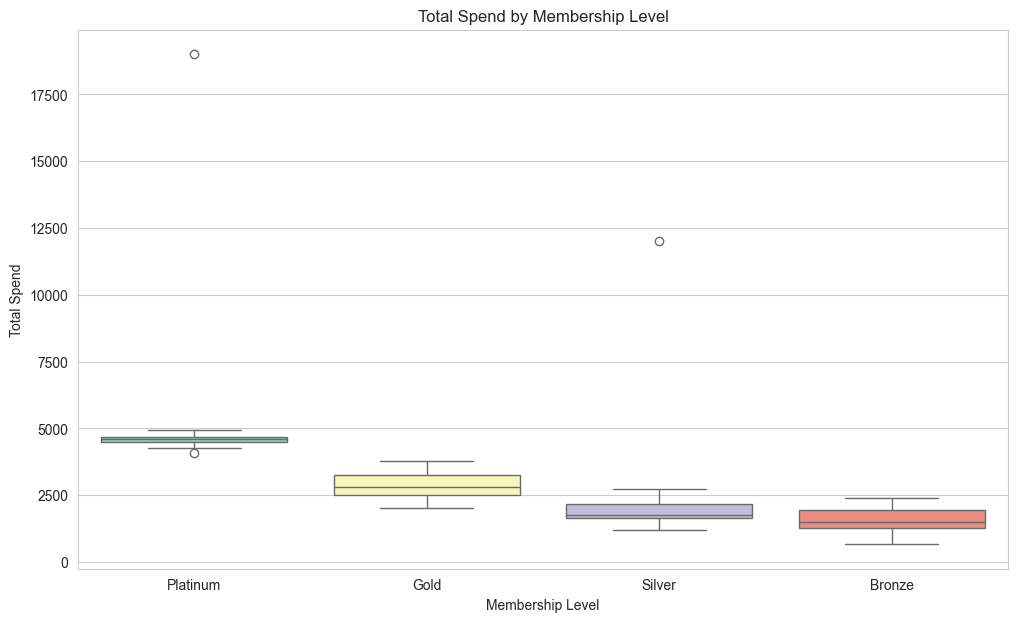

In [42]:
sns.boxplot(data=df, x='MembershipLevel', y='TotalSpend', palette='Set3')
plt.title('Total Spend by Membership Level')
plt.xlabel('Membership Level')
plt.ylabel('Total Spend')
plt.show()
